# Analysis with `crawl`

`crawl` assumes you'll use BigQuery for analysis. The implementation is flexible, so it shouldn't be hard to get it working with other tools. This notebook assumes you understand the basics of BigQuery. It is a tutorial on how to interpret the schema of `crawl`'s output. For some quick recipes, check out the [SQL](https://github.com/benjaminestes/crawl/tree/master/sql) folder in the GitHub repo.

If you haven't used BigQuery from the command-line or from Python before, you'll need to configure the [Google Cloud SDK](https://cloud.google.com/sdk/) before continuing. I'll assume you've run a crawl and uploaded your data to BigQuery. To make things easier, we'll use the BigQuery Jupyter extension. The queries will use BigQuery's [Standard SQL](https://cloud.google.com/bigquery/docs/reference/standard-sql/) dialect.

In [1]:
%load_ext google.cloud.bigquery

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Basic queries

Say you want some information about a single page, or a group of pages. The basics can be reported with a simple query — no joins or aggregation necessary. In `crawl`'s output, each row represents a page. For instance, you can query the `StatusCode` and `Depth` of individual pages:

In [2]:
%%bigquery
SELECT Address.Full,
       Status,
       Depth
FROM crawl.distilled
ORDER BY Depth ASC
LIMIT 5

,Full,Status,Depth
0,https://www.distilled.net/,200 OK,0
1,https://www.distilled.net/store/landing/,301 Moved Permanently,1
2,https://www.distilled.net/store/profile/login/...,Blocked by robots.txt,1
3,https://www.distilled.net/store/profile/register/,200 OK,1
4,https://www.distilled.net/store/profile/passwo...,200 OK,1


If you run this query in the BigQuery web interface, you can then export this table to Sheets or DataStudio.

When running queries in a notebook, the object returned by a `%%bigquery` invocation is a pandas DataFrame. That doesn't matter much if the DataFrame is an anonymous result. We can give it a name by adding one to the invocation, like this:

In [3]:
%%bigquery titles
SELECT Address.Full AS URL,
       Title
FROM crawl.distilled
WHERE StatusCode = 200 AND
      Address.Path LIKE "/resources/%"
ORDER BY Depth ASC

,URL,Title
0,https://www.distilled.net/resources/,Online Marketing Blog and Training Resources |...
1,https://www.distilled.net/resources/3-seo-spli...,3 SEO Split Tests You Should Try | Distilled
2,https://www.distilled.net/resources/posts/,"Distilled Blog | Online Marketing, Search, SEO..."
3,https://www.distilled.net/resources/videos/,HD Video Footage from Distilled's SearchLove C...
4,https://www.distilled.net/resources/creative-i...,Creative Inspiration: Content We Enjoyed this ...
5,https://www.distilled.net/resources/features/,Big Brand Reports and Training Guides from Dis...
6,https://www.distilled.net/resources/technical-...,Technical SEO Audit Checklist for Human Beings...
7,https://www.distilled.net/resources/how-to-be-...,How to be positive at work and make your life ...
8,https://www.distilled.net/resources/announcing...,Announcing Full-Funnel Testing - testing SEO a...
9,https://www.distilled.net/resources/how-to-mak...,How to Make a Histogram using Google Sheets | ...


In [4]:
titles.describe() # titles is now the table resulting from that query

,URL,Title
count,1254,1254
unique,1254,928
top,https://www.distilled.net/resources/videos/sl-...,"Distilled Blog | Online Marketing, Search, SEO..."
freq,1,213


## Summarizing data

You may want to summarize your crawl on some dimension. For instance, you could:

- Group by `Status` to count non-200 status codes.
- Group by `Depth` for a histogram of page depths in the crawl.
- Group by `BodyTextHash` to find pages with (nearly-)identical body content.

Let's see what they look like.

### Status

In [5]:
%%bigquery status
SELECT Status,
       COUNT(*) AS N
FROM crawl.distilled
GROUP BY Status
ORDER BY Status ASC

,Status,N
0,200 OK,3782
1,301 Moved Permanently,285
2,302 Moved Temporarily,155
3,404 Not Found,139
4,Blocked by robots.txt,2526


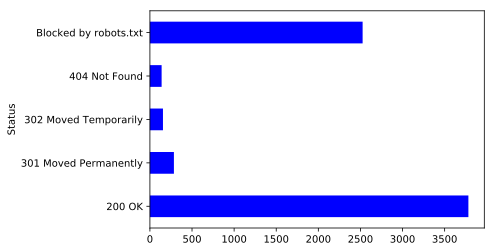

In [6]:
status.plot(
    kind='barh',
    x='Status',
    y='N',
    legend=False,
    color='b',
)

### Depth

In [7]:
%%bigquery depth
SELECT Depth,
       COUNT(*) AS N
FROM crawl.distilled
GROUP BY Depth
ORDER BY Depth ASC
LIMIT 5

,Depth,N
0,0,1
1,1,31
2,2,445
3,3,1394
4,4,1448


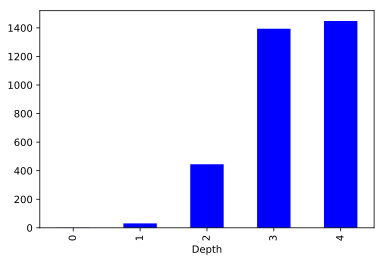

In [8]:
depth.plot(
    kind='bar',
    x='Depth',
    y='N',
    legend=False,
    color='b',
)

### BodyTextHash

When the crawler processes a page, it computes a unique value `BodyTextHash` based on all of the text nodes within the `<body>` tag. Think of this as an identifier for the text content of the page. If two pages share the same `BodyTextHash`, they are probably duplicates.

In [9]:
%%bigquery
SELECT BodyTextHash,
       ARRAY_AGG(Address.Full) AS Instances,
       COUNT(*) AS N
FROM crawl.distilled
WHERE BodyTextHash IS NOT NULL AND
      StatusCode = 200
GROUP BY BodyTextHash
ORDER BY N DESC
LIMIT 5

,BodyTextHash,Instances,N
0,s8KMOPbp341U4YFWdmzF1iwG+beJLnqM0jrBrswuExPnbJ...,"[https://www.distilled.net/, https://www.disti...",4
1,QUPuCxslts+PPl42gupqLIlA+Iy2ykEnm8Gagw2s9fXjSp...,[https://www.distilled.net/blog/bacon-mouthwas...,2
2,CL0DCWRCp4i3OwilAz3bL5tcVCzH7Zr7iAG6MteTpYjKeQ...,[https://www.distilled.net/blog/distilled/a-re...,2
3,vTj1A2EKDGMxwKjSEpBeYkch0zZNfyL5qiVK6dPqqBjvwX...,[https://www.distilled.net/events/searchlove-b...,2
4,tuOR1SJRsm+/pAnLIeh8Yst45YBNCe+08hRlKphFT6uJxK...,[https://www.distilled.net/events/linklove-lon...,2


## Accessing nested data with UNNEST

As you've seen, there are many columns in each row. Some are different kinds of things — `Title` is text, while `StatusCode` is a number. They can also contain an array of values. For instance, all pages will have a single `Title`. On the other hand, pages can have any number of links — even none. That's why the `Links` column is a _repeated_ field. It can contain any number of values.

Another example is the key/value pairs in the HTTP response header. There are a variable number of key-value pairs returned by the server.

In BigQuery, the contents of repeated fields can be accessed with [`UNNEST`](https://cloud.google.com/bigquery/docs/reference/standard-sql/arrays#flattening-arrays). Per the documentation, "`UNNEST` takes an `ARRAY` and returns a table with a single row for each element in the `ARRAY`."

In [10]:
%%bigquery link_graph
SELECT source.Address.Path AS SourcePath,
       target.Address.Path AS TargetPath
FROM crawl.distilled AS source, UNNEST(Links) AS target
WHERE target.Address.Host = "www.distilled.net" AND
      source.Address.Path = "/"
LIMIT 10

,SourcePath,TargetPath
0,/,/
1,/,/services/
2,/,/events/
3,/,/resources/
4,/,/resources/
5,/,/resources/features/
6,/,/u/
7,/,/resources/videos/
8,/,/about/
9,/,/jobs/


## Understanding relationships with JOIN

Sometimes it isn't enough to inspect repeated fields for a page. Often, we need to be able to see whether a page appears in a repeated field from another row. For instance, what if we want to count the number of links to a page? We would need to count all the instances of that page in the `Links` field of every row.

That requires a maneuver called a "self-join". It can be a bit hard to wrap your head around at first. However, once you understand this pattern, most other questions you have can be answered this way. I'll present a sample query and then explain.

In [11]:
%%bigquery
WITH
    q AS (SELECT * FROM crawl.distilled),

    r AS (
        SELECT
            link.Address.Full AS FullAddress,
            COUNT(q.Address) AS InLinks
        FROM q, UNNEST(Links) AS link
        GROUP BY link.Address.Full )

SELECT
    FullAddress,
    Status,
    InLinks
FROM r LEFT JOIN q ON r.FullAddress = q.Address.Full
ORDER BY InLinks DESC
LIMIT 10

,FullAddress,Status,InLinks
0,https://www.distilled.net/resources/,200 OK,11930
1,https://www.distilled.net/u/,200 OK,8170
2,https://www.distilled.net/contact/,200 OK,7546
3,https://www.distilled.net/about/,200 OK,7522
4,https://www.distilled.net/events/,200 OK,7470
5,https://www.distilled.net/services/,200 OK,7443
6,https://www.distilled.net/resources/features/,200 OK,7107
7,https://www.distilled.net/resources/videos/,200 OK,7095
8,https://www.distilled.net/jobs/,200 OK,5096
9,https://www.distilled.net/about/people/,200 OK,5076


The query starts be defining two sub-queries, `q` and `r`. `q` is just an alias for the table containing our crawl data. That way we don't have to type `crawl.distilled` over and over. `r` is a table that counts the number of links pointing to each page of the crawl. It uses `UNNEST` (see previous section) to create a list of all pairs of source and target pages, then counts the number of source pages linking to each target.

In fact, if you only cared about links, then `r` has all the data you need. But what if you want to report other metrics about a page, and `InLinks` is only one of several such data points? Then, you need to _join_ `r` with `q`. I won't give a full tutorial on joins here — I just want to point out the method you'll need.

The final query joins `r` with `q`, where `r.FullAddress = q.Address.Full`. Therefore, it can reference fields from either `r` or `q`. In the example above, we used `InLinks` from `r` and `Status` from `q`.

## Analysis with Python

### Do you need Python?

For most reports, SQL should be sufficient. If you structure your queries wisely, it will also be efficient. However, there are some computations SQL will be unable to perform. For instance, anything involving recursion isn't happening in SQL. But think long and hard about whether you need recursion.

For instance — if you want to know where redirect chains are, do you need to see the whole chain of redirects? That would require recursion. Or could you get away with having a list of URLs that redirect to pages with a 3XX status code? No recursion needed.

If you're sure about using Python, well...

### OK, here's an example.

Imagine that our data set does _not_ include `Depth`. Calculating the distance of a page from some starting page — usually the home page — would then require treating the entire crawl as a graph. The links between pages are the edges of this graph. We would perform a breadth-first analysis of this graph, incrementing a depth variable each time we complete a "level" without finding the page we're looking for.

This only requires two steps: first, execute a named query to associate the query results with a Python variable. Then, do something with that variable.

The first line in the next box is `%%bigquery link_graph`. That means the result of the query will be stored in the Python variable `link_graph` in subsequent cells.

In [12]:
%%bigquery link_graph
SELECT source.Address.Path AS SourcePath,
       target.Address.Path AS TargetPath
FROM crawl.distilled AS source, UNNEST(Links) AS target
WHERE target.Address.Host = "www.distilled.net"

,SourcePath,TargetPath
0,/manifesto/,/
1,/events/searchlove-boston/schedule/,/events/searchlove-boston/schedule/
2,/events/searchlove-boston/schedule/,/events/searchlove-boston/schedule/
3,/events/searchlove-boston/schedule/,/
4,/events/searchlove-boston/schedule/,/events/searchlove-boston/schedule/
5,/events/searchlove-boston/schedule/,/events/searchlove-boston/
6,/events/searchlove-boston/schedule/,/events/searchlove-boston/schedule/
7,/events/searchlove-boston/schedule/,/store/profile/password/reset/
8,/events/searchlove-boston/schedule/,/store/profile/register/
9,/events/searchlove-boston/schedule/,/events/searchlove-boston/schedule/


Now we execute the breadth-first algorithm, keeping track of which pages we've seen and how many levels we've traversed. When we see a page for the first time, we put an entry into a dictionary. The key is the URL and the value is the current depth.

This will take approximately three years to complete — that's why the crawler includes `Depth` as a field by default!

In [13]:
%%time

from collections import deque

def edges(graph, node):
    for edge in graph.loc[graph["SourcePath"] == node].itertuples():
        yield edge

def calculate_depths(graph, root):
    depth = 0
    depths = {root: depth}
    q = deque()
    q.append(root)
    while q:
        root = q.pop()
        depth = depths[root]
        for edge in edges(graph, root):
            target = edge.TargetPath
            if target not in depths:
                depths[target] = depth + 1
                q.append(target)
    return depths
    
depths = calculate_depths(link_graph, "/")

CPU times: user 1min 39s, sys: 989 ms, total: 1min 40s
Wall time: 1min 48s


In [14]:
depths['/resources/posts/marketing/']

6

That pretty expensive, for a relatively small site! How many pages are we talking about?

In [15]:
%%bigquery
SELECT COUNT(Address)
FROM crawl.distilled

,f0_
0,6887


I chose this example to show the difference in cost between using a SQL query and using Python. Don't use Python unless you have to. If you have to, it's there.

## That's about it!

Thanks for reading. If you experience any bugs, please file an issue on GitHub. Happy crawling.